# Analysis Section
###### Import all the necessary python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
#from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score, precision_score
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_excel('car_evaluation.xlsx')

# let's check some sample of our datasets

In [3]:
df.sample(15)

,vhigh,vhigh.1,2,2.1,small,low,unacc
1429,low,high,2,more,big,high,vgood
900,med,vhigh,3,4,small,med,unacc
1394,low,vhigh,5more,more,small,low,unacc
480,high,vhigh,3,more,med,med,unacc
1598,low,med,5more,2,big,low,unacc
1243,med,low,4,2,small,high,unacc
1305,low,vhigh,2,4,small,med,unacc
99,vhigh,vhigh,5more,more,small,med,unacc
1643,low,low,2,more,big,low,unacc
754,high,med,5more,more,big,high,acc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# As we observed from the info methods we have seven objects and total 1727 in each objects and let's check it's null value, it have no null values we can check it also from the info method all objects have the same 1727.

In [5]:
df.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [6]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
df.shape

(1727, 7)

# let's change the name of column's as given in our datadictinary buying, maintainance, doors, persons and etc

In [8]:
df.columns = ['buying','maint', 'doors','persons',
                              'lug_boot','safety','Target']
df.sample(10)

,buying,maint,doors,persons,lug_boot,safety,Target
1645,low,low,2,more,big,high,vgood
855,high,low,5more,more,small,med,unacc
295,vhigh,med,4,more,big,high,acc
228,vhigh,med,2,4,med,med,unacc
1364,low,vhigh,4,4,big,low,unacc
781,high,low,2,more,big,high,acc
875,med,vhigh,2,4,med,low,unacc
691,high,med,3,4,big,high,acc
1377,low,vhigh,5more,2,small,med,unacc
311,vhigh,med,5more,4,big,low,unacc


# let count values we have in all 7 objects and we will observe the unique values in data too.

In [9]:
df['buying'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64

In [10]:
df['maint'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64

In [11]:
df['doors'].value_counts()

3        432
4        432
5more    432
2        431
Name: doors, dtype: int64

In [12]:
df['persons'].value_counts()

4       576
more    576
2       575
Name: persons, dtype: int64

In [13]:
df['lug_boot'].value_counts()

med      576
big      576
small    575
Name: lug_boot, dtype: int64

In [14]:
df['safety'].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

In [15]:
df['Target'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Target, dtype: int64

# let visualize our given datasets before encoding

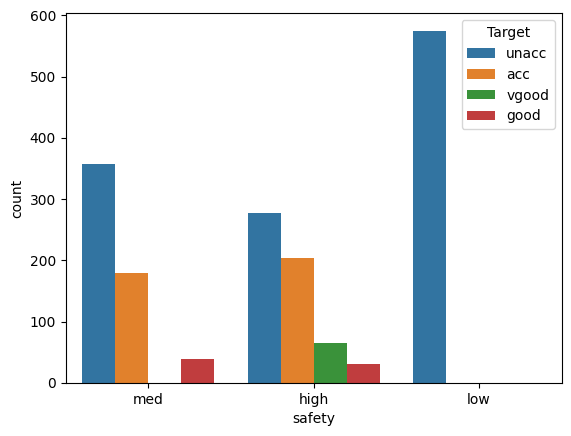

In [16]:
#column = df.columns
sns.countplot(data=df, x="safety", hue="Target")
plt.xticks(rotation=False)
plt.show()

# Modeling Section
- let's model our given datasets by encoding from categirical given data in to the encoded data by replacing some appropriate encoded data like low by 0, med by 1 and high by 2 and etc

In [17]:
df=df.replace("low",0)
df=df.replace("med",1)
df=df.replace("high",2)
df=df.replace("vhigh",3)
df=df.replace("more",4)
df = df.replace("5more",5)

df = df.replace("small",0)
df=df.replace("big",2)

df=df.replace("unacc",0)
df=df.replace("acc",1)
df=df.replace("good",2)
df=df.replace("vgood",3)

# let's see some  ten sample of our encoded datasets how it look like

In [18]:
df.sample(10)

,buying,maint,doors,persons,lug_boot,safety,Target
186,3,2,4,4,2,1,0
1361,0,3,4,4,1,0,0
759,2,0,2,2,1,1,0
1271,1,0,5,2,1,0,0
892,1,3,3,2,0,2,0
1562,0,1,3,4,2,0,0
861,2,0,5,4,2,1,1
936,1,3,4,4,0,1,0
51,3,3,3,4,2,1,0
377,3,0,4,2,0,0,0


# classify Train test data.
- we have to drop the target column from the decision part because it's the predicted part  and assign to x
- we have to assign the target to y and predict it later.

In [19]:
df=pd.read_csv('encoded_data.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,Target
0,3,3,2,2,0,1,0
1,3,3,2,2,0,2,0
2,3,3,2,2,1,0,0
3,3,3,2,2,1,1,0
4,3,3,2,2,1,2,0


In [20]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Target      0
dtype: int64

In [21]:
X = df.drop(['Target'], axis=1)
y = df['Target']

In [22]:
X.sample(10) # the decision part loook like this.

,buying,maint,doors,persons,lug_boot,safety
893,1,3,3,2,1,0
827,2,0,4,4,0,0
1020,1,2,3,4,1,1
484,2,3,3,4,2,2
173,3,2,4,4,1,0
1414,0,2,2,4,0,2
904,1,3,3,4,1,2
757,2,0,2,2,0,2
1409,0,2,2,2,2,0
1645,0,0,2,4,2,2


# let's we see the correlation between objects and observe it.

<AxesSubplot: >

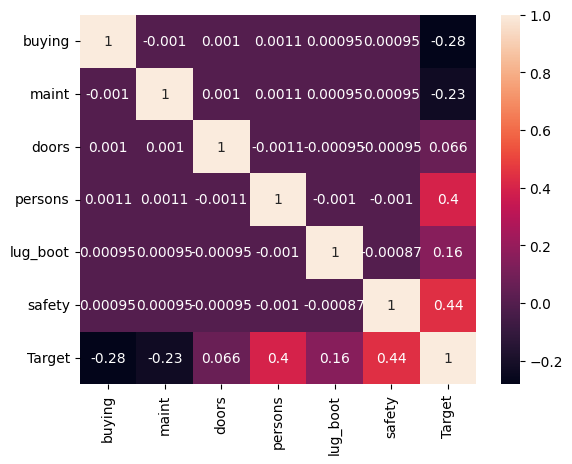

In [23]:
sns.heatmap(df.corr(), annot=True)

# we can observe how their correlations look like 
- the correlation in the main diagonal is 1 which means they are more correlated as they are the same.
- some of the correlation have negative correlation which means a relationship between two variables in which one variable increases as the other decreases, and vice versa
- some of the correlation have postive correlation which means both are increasing or decreasing together

# Classification of data into train and test part

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=1000,
                             criterion='entropy',
                             max_depth=50, random_state=0)
clf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=1000,
                       random_state=0)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Out of %d total number of points incorrectly labelled: %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Out of 200 total number of points incorrectly labelled: 8


In [26]:
def model_prediction(model, X,y):
    predict = model.predict(X)
    print("Accuracy", round(f1_score(y, predict, average='micro')*100, 2))
    print("="*50)
    print(confusion_matrix(y, predict))
    return True

In [27]:
base_model = RandomForestClassifier(n_estimators=50, max_depth=2, max_leaf_nodes=5)
base_model.fit(X_train, y_train)
model_prediction(base_model, X_train, y_train)

Accuracy 94.62
[[394  28]
 [ 15 363]]


True

In [28]:
model_prediction(base_model, X_test, y_test)

Accuracy 95.0
[[ 78   4]
 [  6 112]]


True

In [29]:
rnd_clf = RandomForestClassifier()

params = {
    'max_depth': [2, 3, 5, 9],
    'max_leaf_nodes': [5, 10, 15, 20],
    'n_estimators': [3, 10, 30, 40, 70]
}

g_search = GridSearchCV(estimator = rnd_clf, param_grid = params, 
                          cv = 3, n_jobs = -1,return_train_score=True, verbose = 2)

In [30]:
g_search.fit(X_train, y_train)
print(g_search.best_params_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
{'max_depth': 5, 'max_leaf_nodes': 10, 'n_estimators': 30}


In [31]:
best_grid = g_search.best_estimator_
grid_accuracy = model_prediction(best_grid, X_train, y_train)

Accuracy 96.5
[[403  19]
 [  9 369]]


In [32]:
model_prediction(best_grid, X_test, y_test)

Accuracy 95.0
[[ 78   4]
 [  6 112]]


True

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
def plot_search_results(grid):
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

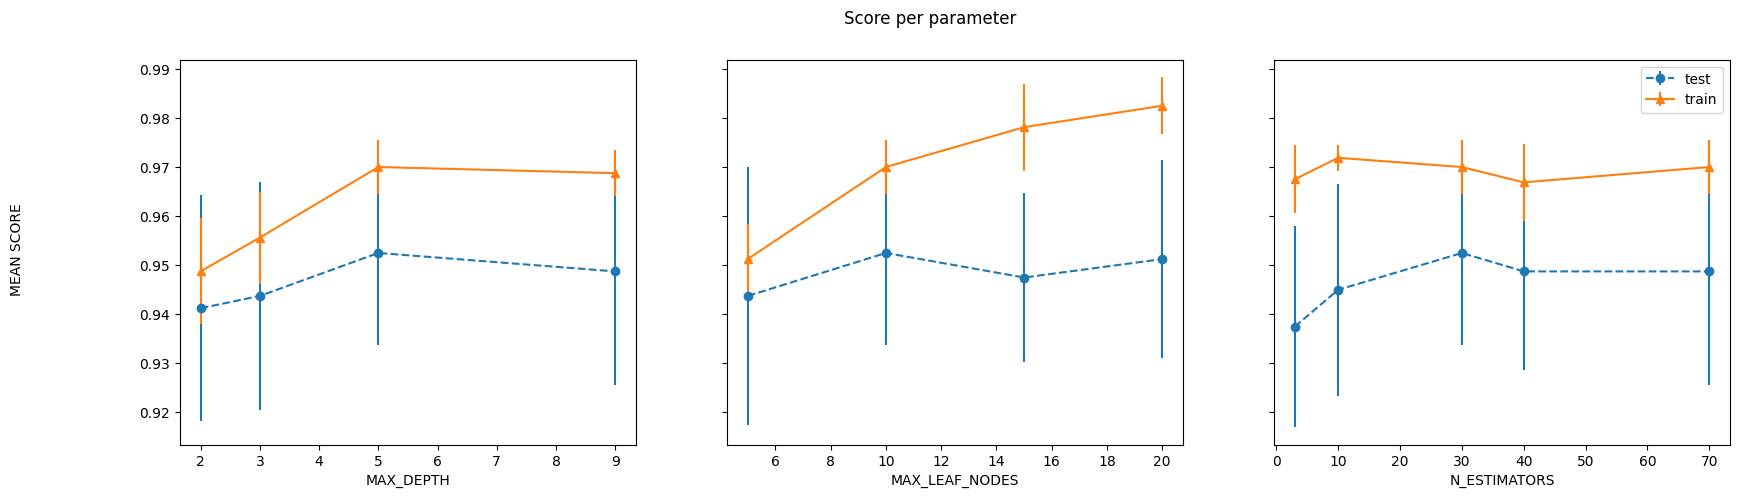

In [35]:
plot_search_results(g_search)

In [36]:
best_wout_Ofitt = RandomForestClassifier(n_estimators=10, max_depth=5, max_leaf_nodes=7)
best_wout_Ofitt.fit(X_train, y_train)
model_prediction(best_wout_Ofitt, X_train, y_train)

Accuracy 95.62
[[402  20]
 [ 15 363]]


True

In [37]:
model_prediction(best_wout_Ofitt, X_test, y_test)

Accuracy 95.0
[[ 78   4]
 [  6 112]]


True

# Confusion matrix

<AxesSubplot: >

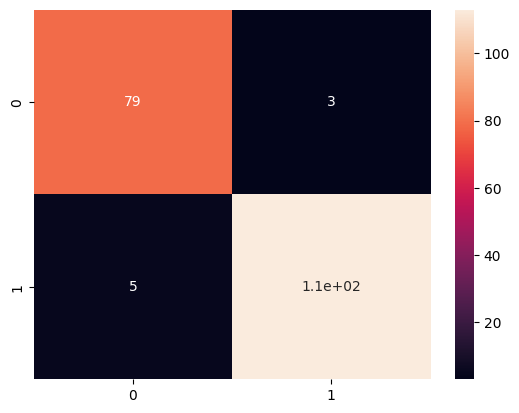

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Classification Report

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        82
           1       0.97      0.96      0.97       118

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [40]:
Accuracy = accuracy_score(y_test,y_pred)    
print("Accuracy: {}%".format(Accuracy*100))

Accuracy: 96.0%
